#### Making the data accessible and installing the necessary packages

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import scipy.stats as stats
# making the data available with the categorical variables converted to numerical variables
data = pd.read_csv('../data/encoded_stroke_data.csv')
# making the data available with the categorical variable without be converted to numerical variables
datac = pd.read_csv('../data/cleaned_stroke_data.csv')

#### Building a heatmap

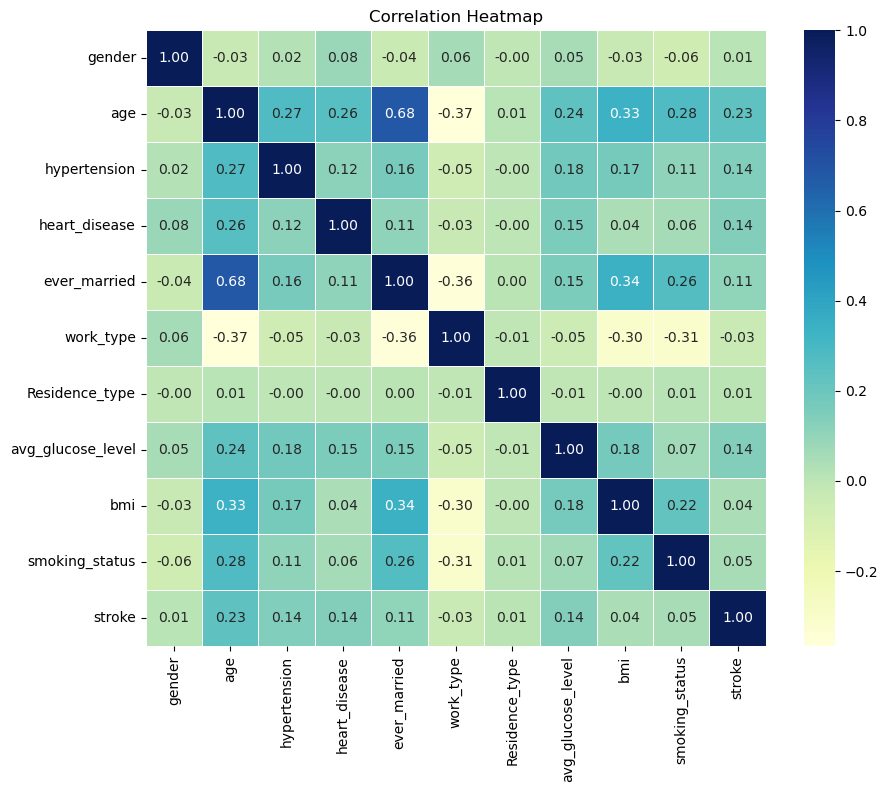

In [56]:
# create a correlation matrix
corr_matrix = data.corr()

# plot a heatmap of the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, 
            annot = True, 
            cmap = 'YlGnBu',
            linewidth = .5,
            fmt = '.2f')
plt.title('Correlation Heatmap')
plt.savefig('../plots/heat_maps/heatmap.png', dpi = 300, bbox_inches='tight') # export the heat map
plt.show()

#### Building a scatter plot with a regression line for the variables `age` and `BMI`

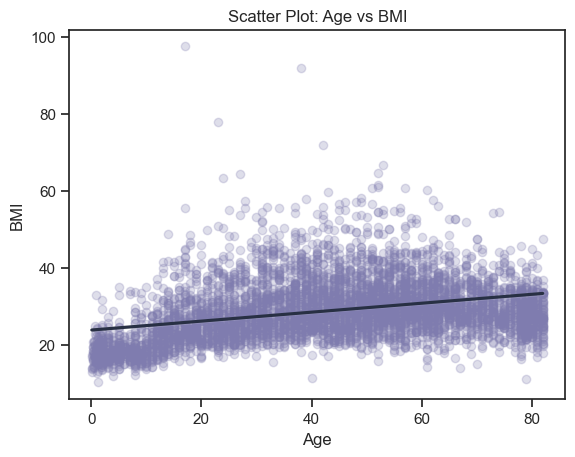

In [62]:
# Create the scatter plot
sns.set(style='ticks')
sns.regplot(data=data,
            x='age',
            y='bmi',
            scatter=True,
            scatter_kws={'color': '#7f7caf', 'alpha': 0.25},
            line_kws={'color': '#283044'})

# Set plot title and labels
plt.title('Scatter Plot: Age vs BMI')
plt.xlabel('Age')
plt.ylabel('BMI')

# Save the figure as an image file
plt.savefig('../plots/bidimensional/scatter_plot-age_bmi.png',dpi = 300, bbox_inches='tight')

# Display the plot
plt.show()

#### Building a joint frequency distribution table and a propotional distribution table for the variables `work_type` and `ever_married`, and printing in LaTeX.

In [ ]:
# Create a crosstab with totals
crosstab = pd.crosstab(datac["work_type"], datac["ever_married"], margins=True, margins_name="Total")

# Create a copy of the crosstab with absolute frequencies
crosstab_abs = crosstab.copy()
crosstab_abs.iloc[:-1, :-1] = crosstab.iloc[:-1, :-1].values
crosstab_abs.iloc[-1, :] = crosstab.iloc[-1, :].values

# Set index and column names
crosstab_abs.index.name = "Work Type"
crosstab_abs.columns.name = "Ever Married"

# Reset index
crosstab_abs = crosstab_abs.reset_index()

# Print the table of joint frequency distribution
print('Tabela de distribuição conjunta de frequências: ')
print(crosstab_abs)

print('--------------------------')

# Create the crosstab with the relative frequencies of ever_married and work_type
rel_crosstab = pd.crosstab(index=datac["work_type"], columns=datac["ever_married"], margins=True, normalize="columns")

# Add a row for the total relative frequencies
rel_crosstab.loc["Total"] = rel_crosstab.sum()

# Print the table of joint frequency distribution with relative frequencies
print('Tabela de distribuição conjunta de frequência das proporções: ')
print(rel_crosstab)
print('--------------------------')

# Print the crosstab in LaTeX format
latex_table = crosstab_abs.to_latex(index=False)
print(latex_table)
print('--------------------------')

# Print the crosstab with relative frequencies in LaTeX format
rel_latex_table = rel_crosstab.to_latex(index=True, column_format="l" + "c"*len(rel_crosstab.columns), na_rep="")
print(rel_latex_table)
print('--------------------------')


#### Boxplot of the variables `age` and `ever_married`

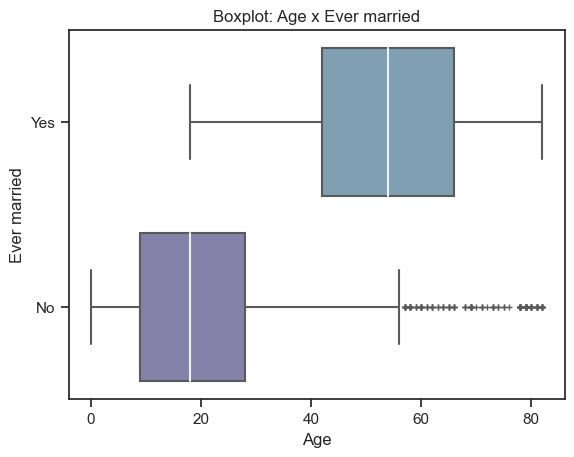

In [67]:
my_pal = {'Yes': '#78a1bb', 'No': '#7f7caf'}
sns.set(style='ticks')
sns.boxplot(data=datac, 
            x ='age', 
            y = 'ever_married', 
            notch = False,
            showcaps = True,
            flierprops = {'marker': '+'},
            medianprops = {'color': '#ebf5ee'},
            linewidth = 1.5,
            orient = 'h',
            palette = my_pal)

plt.title('Boxplot: Age x Ever married')
plt.xlabel('Age')
plt.ylabel('Ever married')

plt.savefig('../plots/bidimensional/boxplot_age-ever_married.png', dpi = 300, bbox_inches='tight')
plt.show()

#### Creating the histogram of the variable `age`, determining the number of bins, and printing it in a LaTeX table.

In [ ]:
# Determine the number of intervals for age
age_min = data['age'].min()  # minimum age
age_max = data['age'].max()  # maximum age
interval_size = 10  # set the size of each interval

# Determine the first class interval starting at 0 and ending at 1
n_intervals = int((age_max - age_min) / interval_size) + 1  # calculate the number of intervals
first_interval_size = 1 - age_min
n_intervals += 1  # add the first interval
intervals = [(0, 1)] + [(i*interval_size+1, (i+1)*interval_size) for i in range(n_intervals-1)]
intervals[0] = (0, first_interval_size)

# Create a histogram of age with intervals and a fade effect
hist, bin_edges = np.histogram(data['age'], bins=[interval[0] for interval in intervals]+[intervals[-1][1]])
colors = ['#EEEEFF', '#7f7caf', '#9fb4c7', '#28587b', '#223843']
for i, interval in enumerate(intervals):
    plt.hist(data['age'], bins=[interval[0], interval[1]], alpha=1-(i/n_intervals), color='#7f7caf', edgecolor='black')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Histograma da variável idade')
plt.savefig('../plots/quantitative_variables/var-age/histogram_age.png', dpi = 300, bbox_inches = 'tight')
plt.show()

# Print the class intervals
for interval in intervals:
    obs = ((data['age'] >= interval[0]) & (data['age'] < interval[1])).sum()
    print(f'{interval}: {obs}')
    
print('--------------------------')

# Print the intervals in LaTeX format
print("\\begin{tabular}{|c|c|}")
print("\\hline")
print("Interval & Observations \\\\")
print("\\hline")
for i, interval in enumerate(intervals):
    print(f"{interval[0]}-{interval[1]} & {hist[i]} \\\\")
print("\\hline")
print("\\end{tabular}")


#### Creating the histogram of the variable `average glucose level`, determining the number of bins, and printing it in a LaTeX table.

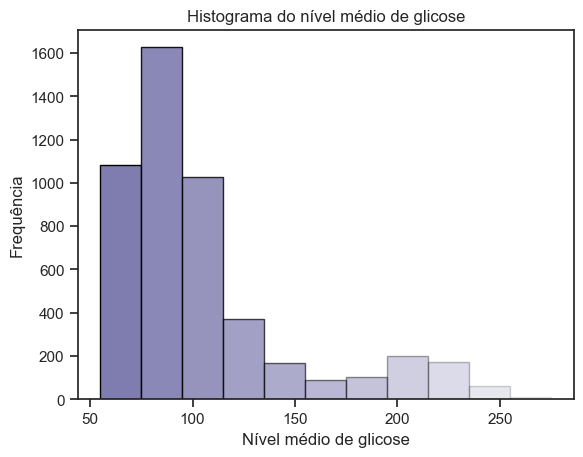

(55, 75): 1082
(75, 95): 1627
(95, 115): 1027
(115, 135): 373
(135, 155): 166
(155, 175): 90
(175, 195): 101
(195, 215): 198
(215, 235): 172
(235, 255): 61
(255, 275): 11
--------------------------
\begin{tabular}{|c|c|}
\hline
Interval & Observations \\
\hline
55-75 & 1082 \\
75-95 & 1627 \\
95-115 & 1027 \\
115-135 & 373 \\
135-155 & 166 \\
155-175 & 90 \\
175-195 & 101 \\
195-215 & 198 \\
215-235 & 172 \\
235-255 & 61 \\
255-275 & 11 \\
\hline
\end{tabular}


In [69]:
# Determine the number of intervals for average glucose level
gluco_min = data['avg_glucose_level'].min()  # minimum glucose level
gluco_max = data['avg_glucose_level'].max()  # maximum glucose level
interval_size = 20  # set the size of each interval

# Determine the intervals
intervals = [(i, i+interval_size) for i in range(int(gluco_min), int(gluco_max)+1, interval_size)]

# Create a histogram of average glucose level with intervals and a fade effect
hist, bin_edges = np.histogram(data['avg_glucose_level'], bins=[interval[0] for interval in intervals]+[intervals[-1][1]])
colors = ['#EEEEFF', '#7f7caf', '#9fb4c7', '#28587b', '#223843']

for i, interval in enumerate(intervals):
    plt.hist(data['avg_glucose_level'], bins=[interval[0], interval[1]], alpha=1-(i/len(intervals)), color='#7f7caf', edgecolor='black')
plt.xlabel('Nível médio de glicose')
plt.ylabel('Frequência')
plt.title('Histograma do nível médio de glicose')
plt.savefig('../plots/quantitative_variables/var-avg_glucose_level/histogram-avg_glucose_level.png', dpi = 300, bbox_inches = 'tight')
plt.show()

# Print the intervals and number of observations
for interval in intervals:
    obs = ((data['avg_glucose_level'] >= interval[0]) & (data['avg_glucose_level'] < interval[1])).sum()
    print(f'{interval}: {obs}')

print('--------------------------')

# Print the intervals in LaTeX format
print("\\begin{tabular}{|c|c|}")
print("\\hline")
print("Interval & Observations \\\\")
print("\\hline")
for i, interval in enumerate(intervals):
    print(f"{interval[0]}-{interval[1]} & {hist[i]} \\\\")
print("\\hline")
print("\\end{tabular}")

#### Creating the histogram of the variable `BMI`, determining the number of bins, and printing it in a LaTeX table.

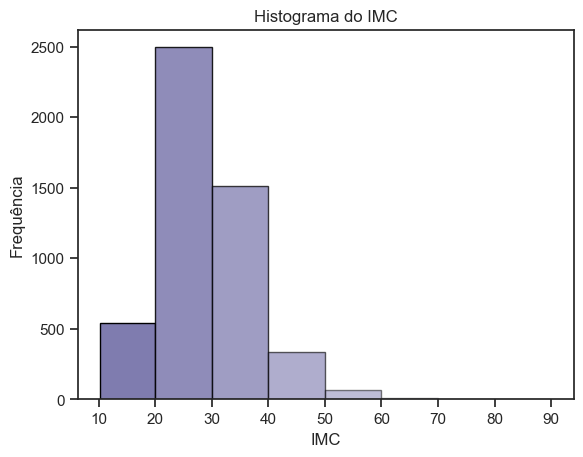

(10.3, 20.0): 520
(20.0, 30.0): 2468
(30.0, 40.0): 1506
(40.0, 50.0): 335
(50.0, 60.0): 66
(60.0, 70.0): 9
(70.0, 80.0): 2
(80.0, 90.0): 0
--------------------------
\begin{tabular}{|c|c|}
\hline
Interval & Observations \\
\hline
10.3-20.0 & 520 \\
20.0-30.0 & 2468 \\
30.0-40.0 & 1506 \\
40.0-50.0 & 335 \\
50.0-60.0 & 66 \\
60.0-70.0 & 9 \\
70.0-80.0 & 2 \\
80.0-90.0 & 0 \\
\hline
\end{tabular}


In [71]:

# Determine the number of intervals for BMI
bmi_min = data['bmi'].min()  # minimum BMI
bmi_max = data['bmi'].max()  # maximum BMI
interval_size = 10  # set the size of each interval

# Determine the first class interval starting at the minimum BMI and ending at the first multiple of interval size
first_interval_size = interval_size - (bmi_min % interval_size)
if first_interval_size == interval_size:
    first_interval_size = 0
n_intervals = int((bmi_max - bmi_min - first_interval_size) / interval_size) + 1  # calculate the number of intervals
intervals = [(bmi_min, bmi_min + first_interval_size)] + [(bmi_min + first_interval_size + i*interval_size, bmi_min + first_interval_size + (i+1)*interval_size) for i in range(n_intervals-1)]

# Create a histogram of BMI with intervals and a fade effect
hist, bin_edges = np.histogram(data['bmi'], bins=[interval[0] for interval in intervals]+[intervals[-1][1]])
colors = ['#EEEEFF', '#7f7caf', '#9fb4c7', '#28587b', '#223843']
for i, interval in enumerate(intervals):
    plt.hist(data['bmi'], bins=[interval[0], interval[1]], alpha=1-(i/n_intervals), color='#7f7caf', edgecolor='black')
plt.xlabel('IMC')
plt.ylabel('Frequência')
plt.title('Histograma do IMC')
plt.savefig('../plots/quantitative_variables/var-bmi/histogram_bmi', dpi = 300, bbox_inches = 'tight')
plt.show()

# Print the intervals with the number of observations
for interval in intervals:
    obs = ((data['bmi'] >= interval[0]) & (data['bmi'] < interval[1])).sum()
    print(f'{interval}: {obs}')
    
print('--------------------------')

# Print the intervals in LaTeX format
print("\\begin{tabular}{|c|c|}")
print("\\hline")
print("Interval & Observations \\\\")
print("\\hline")
for i, interval in enumerate(intervals):
    print(f"{interval[0]}-{interval[1]} & {hist[i]} \\\\")
print("\\hline")
print("\\end{tabular}")

#### Creating a pie chart of the `work_type` variable

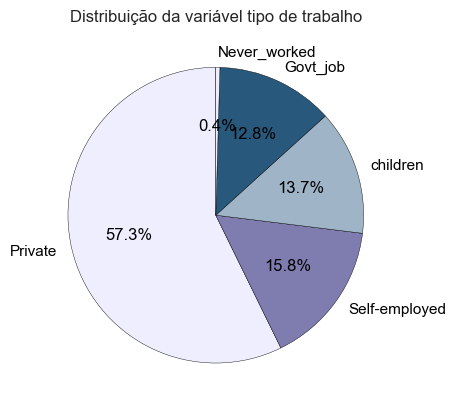

In [72]:
# Calculate the number of males and females
gender_counts = datac['work_type'].value_counts()

# Create a pie chart
labels = gender_counts.index.tolist()
sizes = gender_counts.values.tolist()
colors = ["#EEEEFF", "#7f7caf", "#9fb4c7", '#28587b']
edgecolors = ['#223843', '#223843']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, 
        wedgeprops={'edgecolor': 'black', 'linewidth': 0.3}, textprops={'color':"black"})

# Add a title
plt.title('Distribuição da variável tipo de trabalho')

plt.savefig('../plots/qualitative_variables/var-work_type/pie_chart-work_type', dpi = 300, bbox_inches = 'tight')

# Show the plot
plt.show()


#### Chi-square and p-value of `ever_married` and `work_type`

In [ ]:
# Create a cross-tabulation of ever_married and work_type
ct = pd.crosstab(data['ever_married'], data['work_type'])

# Perform the chi-square test of independence
chi2_stat, p_val, dof, expected = stats.chi2_contingency(ct)

# Print the results
print(f"Chi-square: {chi2_stat:.2f}")
print(f"p-value: {p_val:.10f}")



#### Correlation coefficient between `age` and `BMI`

In [ ]:
corr = data['age'].corr(data['bmi'])

print(f"The correlation coefficient between age and bmi is: {corr:.2f}")

#### Descriptives statistics of `age` by `ever_married` variables

In [ ]:
# Calculate descriptive statistics of age by ever_married
age_stats = datac.groupby('ever_married')['age'].describe()

# Add variance to the statistics
age_variance = datac.groupby('ever_married')['age'].var()
age_stats['variance'] = age_variance

# Add a line with the total for each value
total_stats = datac['age'].describe()
total_variance = datac['age'].var()
total_stats['variance'] = total_variance
age_stats.loc['Total'] = total_stats

print(age_stats)


#### Calculating the Pearson correlation coefficient of `age` and `ever_married` variables

In [ ]:
# Separate the data of the variable "age" into groups, according to "ever_married".
married = datac[datac['ever_married'] == 'Yes']['age']
not_married = datac[datac['ever_married'] == 'No']['age']

# Calculate the descriptives statistics within each group.
married_mean = np.mean(married)
not_married_mean = np.mean(not_married)
married_std = np.std(married)
not_married_std = np.std(not_married)

# Calculate the variance within each group and weight it by the number of observations
married_var = np.var(married, ddof=1) * len(married) / len(stroke_df)
not_married_var = np.var(not_married, ddof=1) * len(not_married) / len(stroke_df)

# Calculate the mean of the weighted variances
weighted_var = married_var + not_married_var

# Compare it with the total variance of the 'age' variable.
total_var = np.var(stroke_df['age'], ddof=1)
if weighted_var <= total_var:
    print(f'The weighted variance is lower ({weighted_var:.3f}) or equal to the total variance ({total_var:.3f}).')
else:
    print(f'The weighted variance is higher ({weighted_var:.3f}) than the total variance ({total_var:.3f}).')

# Calculate the Pearson correlation coefficient
correlation = datac['age'].corr(datac['ever_married'].astype('category').cat.codes)
print(f"The Pearson correlation coefficient is {correlation:.2f}")